# Revise linear function with Sigmoid function:

$f = sig(linear(x))$

- for two classes (1-D)
- Cost function:
   
    $cost(y,h) = -log(h), if y = 1 $
   
    $cost(y,h) = -log(1-h), if y = 0 $
    
    $cost(y,h) = -ylog(h) -(1-h)log(1-h)$


- The cost function is derived from the principle of maximum entropy.

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/miniconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
learning_rate = 0.01
training_epochs = 1000

def sigmoid(x):
    return 1. / (1. + np.exp(-x))

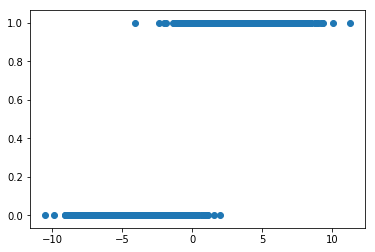

In [7]:
x1 = np.random.normal(-4, 2, 1000)
x2 = np.random.normal(4, 2, 1000)
xs = np.append(x1, x2)
ys = np.asarray([0.] * len(x1) + [1.] * len(x2))

plt.scatter(xs, ys)

In [22]:
X = tf.placeholder(tf.float32, shape=(None,), name="x")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")

w = tf.Variable([0., 0.], name="parameter", trainable=True)

# Using TF's sigmoid function
y_model = tf.sigmoid(w[1] * X + w[0])

# Cross-Entropy loss function
cost = tf.reduce_mean(-Y * tf.log(y_model) - (1-Y) * tf.log(1 - y_model))

######  Cross-Entropy loss function in Tensorflow

* tf.reduce_mean
* tf.nn.softmax_cross_entropy_with_logits_v2

https://www.tensorflow.org/api_docs/python/tf/nn/softmax_cross_entropy_with_logits_v2

In [23]:
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [24]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X: xs, Y: ys})
        print(epoch, err)
    
#     w_val = sess.run(w, {X:xs, Y:ys})
    w_val = sess.run(w)
    print(w_val)

0 0.6931461
1 0.6546753
2 0.6199227
3 0.58850443
4 0.56006265
5 0.53426975
6 0.5108309
7 0.48948246
8 0.46999073
9 0.45214948
10 0.4357774
11 0.4207154
12 0.40682375
13 0.39398018
14 0.3820771
15 0.37102008
16 0.3607261
17 0.35112196
18 0.34214288
19 0.33373162
20 0.32583722
21 0.31841466
22 0.3114235
23 0.304828
24 0.2985958
25 0.29269794
26 0.28710833
27 0.28180385
28 0.27676293
29 0.27196673
30 0.26739758
31 0.26303983
32 0.25887907
33 0.25490218
34 0.25109705
35 0.2474528
36 0.24395923
37 0.24060714
38 0.23738803
39 0.234294
40 0.23131771
41 0.22845267
42 0.22569248
43 0.22303143
44 0.22046414
45 0.21798576
46 0.21559155
47 0.21327725
48 0.21103887
49 0.20887259
50 0.20677494
51 0.20474266
52 0.20277265
53 0.20086198
54 0.19900803
55 0.19720814
56 0.19545999
57 0.19376129
58 0.19210994
59 0.19050394
60 0.18894137
61 0.18742047
62 0.18593957
63 0.18449698
64 0.18309128
65 0.18172094
66 0.18038474
67 0.17908126
68 0.17780931
69 0.17656773
70 0.1753554
71 0.17417136
72 0.17301449
73 0

624 0.08252014
625 0.082494505
626 0.08246893
627 0.08244344
628 0.08241802
629 0.082392685
630 0.0823674
631 0.08234222
632 0.08231711
633 0.08229206
634 0.08226709
635 0.08224219
636 0.082217366
637 0.08219262
638 0.08216795
639 0.08214336
640 0.08211882
641 0.082094364
642 0.08206998
643 0.08204566
644 0.08202141
645 0.08199724
646 0.081973135
647 0.0819491
648 0.08192514
649 0.08190124
650 0.08187741
651 0.08185366
652 0.081829965
653 0.08180633
654 0.0817828
655 0.08175931
656 0.0817359
657 0.08171255
658 0.08168927
659 0.08166605
660 0.0816429
661 0.08161982
662 0.0815968
663 0.08157387
664 0.08155096
665 0.081528135
666 0.08150539
667 0.08148269
668 0.081460066
669 0.081437506
670 0.081415005
671 0.081392564
672 0.08137019
673 0.08134787
674 0.081325635
675 0.081303455
676 0.08128133
677 0.08125924
678 0.08123726
679 0.0812153
680 0.081193425
681 0.08117161
682 0.081149854
683 0.08112815
684 0.081106514
685 0.08108494
686 0.08106341
687 0.08104196
688 0.08102056
689 0.080999225


<function matplotlib.pyplot.show>

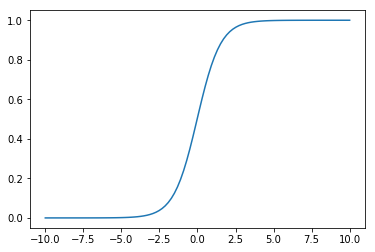

In [25]:
all_xs = np.linspace(-10, 10, 100)
plt.plot(all_xs, sigmoid((all_xs * w_val[1] + w_val[0])))
plt.show

### 多維度 (Input) Logistic Regression
Ex 1. 購買手機：

    Inputs:  3-D independent variables
        1. OS
        2. Size
        3. Cost
    Output: 1-D dependent variable
        Worth?

Ex 2. 城市中兩個地區的犯罪活動，找出在位置(6,4)的地方最有可能是屬於哪地區的犯罪？

    1. x: 經度
    2. y: 緯度
    
    Output M(x) :
    
$M(x; w) = sig(w_2x_2 + w_1x_1 + w_0)$

In [26]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

learning_rate = 0.1
training_epochs = 2000

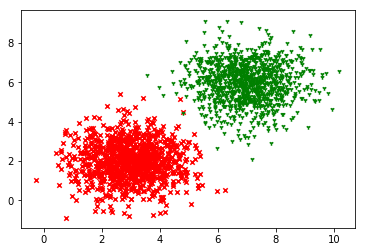

In [36]:
def sigmoid(x):
    return 1. / (1. + np.exp(-x))
x1_label1 = np.random.normal(3, 1, 1000)
x2_label1 = np.random.normal(2, 1, 1000)
x1_label2 = np.random.normal(7, 1, 1000)
x2_label2 = np.random.normal(6, 1, 1000)
x1s = np.append(x1_label1, x1_label2)
x2s = np.append(x2_label1, x2_label2)
ys = np.asarray([0.] * len(x1_label1) + [1.] * len(x1_label2))

plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)

In [30]:
X1 = tf.placeholder(tf.float32, shape=(None,), name="x1")
X2 = tf.placeholder(tf.float32, shape=(None,), name="x2")
Y = tf.placeholder(tf.float32, shape=(None,), name="y")
w = tf.Variable([0., 0., 0.], name="w", trainable=True)

In [31]:
y_model = tf.sigmoid(w[2] * X2 + w[1] * X1 + w[0])
cost = tf.reduce_mean(-tf.log(y_model * Y + (1 - y_model) * (1 - Y)))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [32]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    prev_err = 0
    for epoch in range(training_epochs):
        err, _ = sess.run([cost, train_op], {X1: x1s, X2: x2s, Y: ys})
        print(epoch, err)
        if abs(prev_err - err) < 0.0001:
            break
        prev_err = err
    w_val = sess.run(w, {X1: x1s, X2: x2s, Y: ys})

0 0.6931461
1 0.609286
2 0.6024527
3 0.59755385
4 0.59279335
5 0.5881558
6 0.583636
7 0.5792292
8 0.5749304
9 0.57073534
10 0.5666398
11 0.5626393
12 0.5587301
13 0.5549086
14 0.5511709
15 0.54751366
16 0.5439337
17 0.540428
18 0.5369934
19 0.53362733
20 0.5303267
21 0.52708936
22 0.5239126
23 0.5207943
24 0.5177322
25 0.514724
26 0.5117679
27 0.50886196
28 0.50600433
29 0.5031933
30 0.50042737
31 0.49770477
32 0.49502403
33 0.49238384
34 0.4897827
35 0.48721936
36 0.48469275
37 0.48220146
38 0.4797445
39 0.47732085
40 0.47492945
41 0.4725693
42 0.47023943
43 0.46793905
44 0.46566725
45 0.4634233
46 0.46120626
47 0.4590155
48 0.45685035
49 0.45470998
50 0.45259404
51 0.45050153
52 0.44843215
53 0.4463852
54 0.4443601
55 0.44235638
56 0.4403736
57 0.4384112
58 0.43646875
59 0.43454576
60 0.43264169
61 0.43075642
62 0.4288894
63 0.4270401
64 0.42520836
65 0.4233939
66 0.4215961
67 0.41981488
68 0.4180497
69 0.41630045
70 0.4145668
71 0.41284832
72 0.41114482
73 0.4094561
74 0.40778205
75

668 0.12156604
669 0.12143429
670 0.1213029
671 0.121171854
672 0.12104109
673 0.12091069
674 0.12078059
675 0.12065084
676 0.120521374
677 0.12039226
678 0.12026345
679 0.120134965
680 0.12000678
681 0.1198789
682 0.11975137
683 0.1196241
684 0.119497195
685 0.11937059
686 0.11924428
687 0.11911829
688 0.1189926
689 0.1188672
690 0.11874213
691 0.11861734
692 0.11849287
693 0.118368685
694 0.11824483
695 0.118121244
696 0.117997944
697 0.11787499
698 0.117752284
699 0.1176299
700 0.117507786
701 0.11738597
702 0.11726448
703 0.11714323
704 0.11702229
705 0.11690166
706 0.116781294
707 0.11666122
708 0.116541415
709 0.11642193
710 0.116302684
711 0.11618373
712 0.116065085
713 0.11594675
714 0.115828626
715 0.1157108
716 0.11559325
717 0.11547599
718 0.11535899
719 0.11524228
720 0.11512583
721 0.11500967
722 0.11489374
723 0.11477813
724 0.11466276
725 0.114547685
726 0.11443285
727 0.11431829
728 0.114204004
729 0.11408996
730 0.113976195
731 0.113862686
732 0.11374944
733 0.11363646

In [34]:
x1_boundary, x2_boundary = [], []
for x1_test in np.linspace(0, 10, 100):
    for x2_test in np.linspace(0, 10, 100):
        z = sigmoid(-x2_test*w_val[2] - x1_test*w_val[1] - w_val[0])
        if abs(z - 0.5) < 0.01:
            x1_boundary.append(x1_test)
            x2_boundary.append(x2_test)

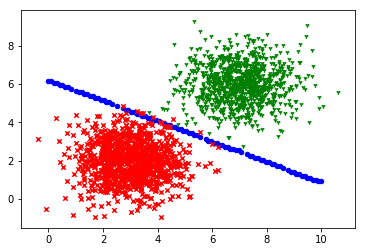

In [35]:
plt.scatter(x1_boundary, x2_boundary, c='b', marker='o', s=20)
plt.scatter(x1_label1, x2_label1, c='r', marker='x', s=20)
plt.scatter(x1_label2, x2_label2, c='g', marker='1', s=20)
plt.show()

### Multiclass Classifier

###### One-versus-all
一種標籤對應一個分類器。因此，三種標籤分別對應三個不同的分類器。

###### One-versus-one
一個分類器對應成對的標籤，如：三種標籤可以形成三種組合，由同一個分類器來分。
但是若是 k 個標籤，則會有 k(k-1)/2 種組合需要區分。

###### Softmax Regression

* Softmax is named after max function. 
* It’s a “soft” or “smooth” approximation of the max function.
* 對於多類分類器問題，每一個類別的輸入向量會有一個信心分數(confidence/probability score), softmax 會挑選分數最高的當輸出。

In [37]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

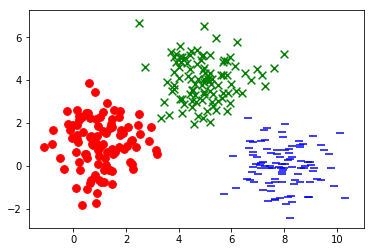

In [38]:
x1_label0 = np.random.normal(1, 1, (100, 1))
x2_label0 = np.random.normal(1, 1, (100, 1))
x1_label1 = np.random.normal(5, 1, (100, 1))
x2_label1 = np.random.normal(4, 1, (100, 1))
x1_label2 = np.random.normal(8, 1, (100, 1))
x2_label2 = np.random.normal(0, 1, (100, 1))

plt.scatter(x1_label0, x2_label0, c='r', marker='o', s=60)
plt.scatter(x1_label1, x2_label1, c='g', marker='x', s=60)
plt.scatter(x1_label2, x2_label2, c='b', marker='_', s=60)
plt.show()

In [39]:
xs_label0 = np.hstack((x1_label0, x2_label0))
xs_label1 = np.hstack((x1_label1, x2_label1))
xs_label2 = np.hstack((x1_label2, x2_label2))
xs = np.vstack((xs_label0, xs_label1, xs_label2))

# One-hot encoding labels
labels = np.matrix([[1., 0., 0.]] * len(x1_label0) + [[0., 1., 0.]] * len(x1_label1) + [[0., 0., 1.]] * len(x1_label2))

In [40]:
# Shuffles dataset
arr = np.arange(xs.shape[0])
np.random.shuffle(arr)
xs = xs[arr, :]
labels = labels[arr, :]

In [43]:
# Testing set
test_x1_label0 = np.random.normal(1, 1, (10, 1))
test_x2_label0 = np.random.normal(1, 1, (10, 1))
test_x1_label1 = np.random.normal(5, 1, (10, 1))
test_x2_label1 = np.random.normal(4, 1, (10, 1))
test_x1_label2 = np.random.normal(8, 1, (10, 1))
test_x2_label2 = np.random.normal(0, 1, (10, 1))
test_xs_label0 = np.hstack((test_x1_label0, test_x2_label0))
test_xs_label1 = np.hstack((test_x1_label1, test_x2_label1))
test_xs_label2 = np.hstack((test_x1_label2, test_x2_label2))

test_xs = np.vstack((test_xs_label0, test_xs_label1, test_xs_label2)) 
test_labels = np.matrix([[1., 0., 0.]] * 10 + [[0., 1., 0.]] * 10 + [[0., 0.,1.]] * 10)

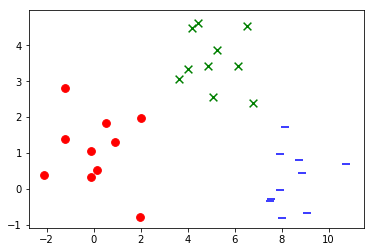

In [52]:
plt.scatter(test_x1_label0, test_x2_label0, c='r', marker='o', s=60)
plt.scatter(test_x1_label1, test_x2_label1, c='g', marker='x', s=60)
plt.scatter(test_x1_label2, test_x2_label2, c='b', marker='_', s=60)
plt.show()

In [46]:
train_size, num_features = xs.shape
print(train_size,",", num_features)

300 , 2


In [48]:
import tensorflow as tf

learning_rate = 0.01
training_epochs = 1000
num_labels = 3
batch_size = 100

X = tf.placeholder("float", shape=[None, num_features])
Y = tf.placeholder("float", shape=[None, num_labels])
W = tf.Variable(tf.zeros([num_features, num_labels]))
b = tf.Variable(tf.zeros([num_labels]))
y_model = tf.nn.softmax(tf.matmul(X, W) + b)

cost = -tf.reduce_sum(Y * tf.log(y_model))
train_op = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

correct_prediction = tf.equal(tf.argmax(y_model, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

In [49]:
# 
with tf.Session() as sess:
    tf.global_variables_initializer().run()
    
    for step in range(training_epochs * train_size // batch_size):
        offset = (step * batch_size) % train_size
        batch_xs = xs[offset:(offset + batch_size), :]
        batch_labels = labels[offset:(offset + batch_size)]
        err, _ = sess.run([cost, train_op], feed_dict={X: batch_xs, Y: batch_labels})
        print (step, err)
    
    W_val = sess.run(W)
    print('w', W_val)
    b_val = sess.run(b)
    print('b', b_val)
    print("accuracy", accuracy.eval(feed_dict={X: test_xs, Y: test_labels}))

0 109.86121
1 141.51654
2 79.50367
3 103.33972
4 427.51642
5 76.68634
6 58.97169
7 99.39086
8 37.092373
9 27.584755
10 50.17708
11 26.784988
12 20.89514
13 21.071745
14 20.476597
15 16.556543
16 22.80243
17 19.441254
18 17.191565
19 15.760588
20 14.474742
21 12.352999
22 14.858261
23 13.458851
24 11.518614
25 12.675474
26 11.545845
27 10.4938135
28 11.973233
29 10.58869
30 9.8676195
31 11.072226
32 9.661036
33 9.35757
34 10.4594755
35 8.944819
36 8.933901
37 9.911524
38 8.347286
39 8.576612
40 9.442782
41 7.8468904
42 8.267731
43 9.030707
44 7.421202
45 7.9959397
46 8.664447
47 7.0542955
48 7.7530613
49 8.335695
50 6.734227
51 7.5332847
52 8.038336
53 6.4519863
54 7.332397
55 7.7676897
56 6.200689
57 7.14729
58 7.520087
59 5.9750204
60 6.9756155
61 7.2925644
62 5.7708244
63 6.815569
64 7.0827017
65 5.5848117
66 6.665726
67 6.888476
68 5.414354
69 6.5249496
70 6.7081795
71 5.2573214
72 6.3923073
73 6.5403543
74 5.111978
75 6.2670255
76 6.3837404
77 4.97689
78 6.148444
79 6.2372465
80 4.

707 1.135484
708 2.2037458
709 2.0300217
710 1.1322502
711 2.1998029
712 2.0262268
713 1.1290381
714 2.1958866
715 2.0224562
716 1.1258495
717 2.1919916
718 2.0187087
719 1.1226814
720 2.188121
721 2.0149863
722 1.1195368
723 2.1842744
724 2.0112863
725 1.1164125
726 2.1804488
727 2.0076098
728 1.1133089
729 2.176648
730 2.003957
731 1.1102276
732 2.172867
733 2.0003262
734 1.1071665
735 2.1691103
736 1.9967191
737 1.104127
738 2.1653738
739 1.9931324
740 1.1011066
741 2.1616614
742 1.9895693
743 1.0981063
744 2.1579702
745 1.9860264
746 1.0951264
747 2.1543
748 1.9825072
749 1.0921665
750 2.1506505
751 1.9790082
752 1.0892254
753 2.1470215
754 1.9755311
755 1.086305
756 2.1434133
757 1.9720742
758 1.0834019
759 2.1398273
760 1.9686383
761 1.080519
762 2.1362593
763 1.9652225
764 1.0776534
765 2.1327114
766 1.9618275
767 1.0748087
768 2.1291852
769 1.9584523
770 1.0719802
771 2.1256783
772 1.9550961
773 1.0691701
774 2.1221905
775 1.9517621
776 1.0663788
777 2.1187208
778 1.9484457
779

1418 0.7069258
1419 1.6385895
1420 1.5011495
1421 0.70589364
1422 1.6370839
1423 1.4997871
1424 0.7048656
1425 1.6355834
1426 1.4984299
1427 0.70384145
1428 1.6340865
1429 1.4970752
1430 0.70282066
1431 1.6325938
1432 1.4957255
1433 0.701802
1434 1.6311042
1435 1.4943792
1436 0.7007878
1437 1.6296204
1438 1.4930369
1439 0.69977725
1440 1.6281412
1441 1.4916991
1442 0.6987705
1443 1.6266646
1444 1.4903644
1445 0.6977664
1446 1.6251926
1447 1.489034
1448 0.6967659
1449 1.6237246
1450 1.4877084
1451 0.69576836
1452 1.622262
1453 1.4863861
1454 0.69477487
1455 1.6208012
1456 1.4850682
1457 0.69378495
1458 1.6193457
1459 1.4837538
1460 0.6927979
1461 1.6178943
1462 1.4824433
1463 0.6918139
1464 1.616446
1465 1.4811362
1466 0.6908337
1467 1.6150016
1468 1.479834
1469 0.6898562
1470 1.6135622
1471 1.4785349
1472 0.68888223
1473 1.6121267
1474 1.4772383
1475 0.68791234
1476 1.6106944
1477 1.4759475
1478 0.68694365
1479 1.6092668
1480 1.4746592
1481 0.68598044
1482 1.6078414
1483 1.4733762
1484

2033 0.5495435
2034 1.3963834
2035 1.2852697
2036 0.5489701
2037 1.3954474
2038 1.2844479
2039 0.54839706
2040 1.394514
2041 1.2836275
2042 0.5478268
2043 1.3935821
2044 1.2828093
2045 0.547257
2046 1.3926516
2047 1.2819932
2048 0.5466889
2049 1.3917224
2050 1.2811776
2051 0.5461216
2052 1.3907957
2053 1.2803652
2054 0.54555684
2055 1.3898712
2056 1.2795537
2057 0.54499346
2058 1.388947
2059 1.278744
2060 0.5444299
2061 1.3880255
2062 1.2779363
2063 0.5438687
2064 1.3871052
2065 1.2771292
2066 0.543309
2067 1.3861877
2068 1.2763245
2069 0.54275024
2070 1.3852723
2071 1.2755207
2072 0.5421928
2073 1.3843588
2074 1.274719
2075 0.54163784
2076 1.3834448
2077 1.2739191
2078 0.5410819
2079 1.3825347
2080 1.2731211
2081 0.54052913
2082 1.3816249
2083 1.2723246
2084 0.5399766
2085 1.3807174
2086 1.2715281
2087 0.5394254
2088 1.379813
2089 1.2707345
2090 0.5388768
2091 1.3789083
2092 1.2699425
2093 0.5383283
2094 1.3780055
2095 1.2691522
2096 0.53778136
2097 1.3771049
2098 1.2683632
2099 0.537

2597 0.46122637
2598 1.2467159
2599 1.154981
2600 0.46084097
2601 1.2460381
2602 1.1543936
2603 0.46045607
2604 1.245359
2605 1.1538069
2606 0.4600728
2607 1.2446817
2608 1.1532228
2609 0.45968944
2610 1.2440052
2611 1.1526397
2612 0.4593073
2613 1.2433307
2614 1.1520565
2615 0.45892543
2616 1.2426564
2617 1.1514744
2618 0.4585445
2619 1.2419825
2620 1.1508937
2621 0.4581651
2622 1.2413104
2623 1.1503136
2624 0.4577853
2625 1.2406399
2626 1.1497343
2627 0.45740622
2628 1.2399698
2629 1.1491563
2630 0.45702958
2631 1.2393004
2632 1.1485784
2633 0.45665118
2634 1.2386326
2635 1.1480014
2636 0.45627436
2637 1.2379652
2638 1.1474254
2639 0.45589837
2640 1.2372997
2641 1.1468508
2642 0.4555235
2643 1.2366344
2644 1.146277
2645 0.45514908
2646 1.2359697
2647 1.1457053
2648 0.45477533
2649 1.2353067
2650 1.1451327
2651 0.45440182
2652 1.2346431
2653 1.1445616
2654 0.45402974
2655 1.2339838
2656 1.1439911
2657 0.45365775
2658 1.2333227
2659 1.1434214
2660 0.45328683
2661 1.2326638
2662 1.14285